# PROJET **CO2**





Ce NoteBook est organisé pour rendre compte de la progression chronologique de notre travail.  
Il décrit nos recherches, codes réalisé, et pistes de reflexions.


Source du jeu de données: European Environment Agency (EEA)  

https://www.eea.europa.eu/en/datahub/datahubitem-view/fa8b1229-3db6-495d-b18e-9c9b3267c02b



# 1. Mise en place de l'environnement

In [1]:
## Montage Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [78]:
# Import des libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 2. Chargement du jeu de données et inspection des colonnes

| ABBREV. | NOM COLONNE | REMARQUES |
| --------|------------ | --------- |
| ID | ID |
| Country | Country | S
| VFN | Vehicle family identification |
| Mp | Pool | S |
| Mh | Manufacturer name | S |
| Man | Manuf name OEM | S |
| MMS | Manuf name MS | S |
| Tan | Type approval number |  |
| T | Type |  |
| Va | Variant |  |
| Ve | Version |  |
| Mk | Make | R Attention encodage: bcp de valeurs uniques |
| Cn | Commercial name | R Attention encodage |
| Ct | Category of the vehicle |  |
| Cr | Category of the ... |  |
| r | Total new registrations | S |
| m | Mass in running order | R |
| Mt (kg) | WLTP test mass |  |
| Enedc (g/km) | Specific CO2 Emissions in g/km (NEDC) | S |
| Enedc (g/km) | Specific CO2 Emissions in g/km (WLTP) | TARGET |
| W (mm) | Base wheel in mm |  |
| At1(mm) | Axle width steering |  |
| At2 (mm) | Axle width other axle in mm |  |
| Ft | Fuel type |  |
| Fm | Fuel mode | R, à encoder |
| ec (cm3) | Engine capacity in cm3 |  |
| ep (KW) | Engine power in KW | S |
| z (Wh/km) | Electric energy consumption in Wh/km | S |
| IT | Innovative technology or group of innovative technologies |  |
| Ernedc (g/km) | Emissions reduction through innovative technologies in g/km |  S
| Erwltp (g/km) | Emissions reduction through innovative technologies in g/km (WLTP) |S
| De | Deviation factor |  |
| Vf | Verification factor |  |
| Status |  Status |
| year | registration year | S |
| Date of registration | Date of registration | S |
| Fuel consumption | Fuel consumption | S
| Electric range (km) | Electric range (km) | S

In [79]:
# se placer dans '/content/gdrive/MyDrive/ROOT/' pour avoir des chemins relatifs
# %cd "/content/gdrive/MyDrive/ROOT/"
%pwd

'd:\\0 PERSO\\00 LUDO\\Google Drive\\0 LUDO\\Projets\\Cours_info\\05 Projet Dts\\Projet_drive'

In [80]:
# Lecture du dataset France+Allemagne 2021: 8,5 Millions de éhicules

name = "c02_fr&al_21_v02.csv"        # 8 500 000 entries    
path = "./Dataset/"
df = pd.read_csv(path+name, low_memory=False)


In [74]:
# Gestion d'un dataset réduit  100 000 vehicules
# Dataset_reduit disponible dans le dossier data (pour tests de code).

path = "./Dataset/"

# with Pickle    (25Mo)
name = "c02_fr&al_21_v02_1e5.pkl" 
# dft = df.sample(100000, random_state=29)
# dft.to_pickle(path+name)
dft1 = pd.read_pickle(path+name)

# with CSV, (moins bien, remet l'index à 0)    (24Mo)
# name = "c02_fr&al_21_v02_1e5.csv" 
# dft = df.sample(100000, random_state=29)
# dft.to_csv(path+name, index = False)
# dft2 = pd.read_csv(path+name)

In [81]:
# Changement des formats numériques en formats plus légers

floats = df.select_dtypes(include=['float']).columns
ints = df.select_dtypes(include=['int']).columns

df[floats] = df[floats].astype('float32')
df[ints] = df[ints].astype('float32')

In [82]:
# Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8517883 entries, 0 to 8517882
Data columns (total 38 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    float32
 1   Country               object 
 2   VFN                   object 
 3   Mp                    object 
 4   Mh                    object 
 5   Man                   object 
 6   MMS                   float32
 7   Tan                   object 
 8   T                     object 
 9   Va                    object 
 10  Ve                    object 
 11  Mk                    object 
 12  Cn                    object 
 13  Ct                    object 
 14  Cr                    object 
 15  r                     float32
 16  m (kg)                float32
 17  Mt                    float32
 18  Enedc (g/km)          float32
 19  Ewltp (g/km)          float32
 20  W (mm)                float32
 21  At1 (mm)              float32
 22  At2 (mm)              float32
 23  Ft     

In [83]:
# Utilisation des noms complets de colonne

abbrev_list = [
    'ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va', 'Ve', 'Mk',
    'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)',
    'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT',
    'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
    'Fuel consumption ', 'Electric range (km)'
]

nom_colonne_list = [
    'ID', 'Country', 'VehicleFamilyIdentification', 'Pool', 'ManufacturerName', 'ManufNameOem',
    'ManufNameMS', 'TypeApprovalNumber', 'Type', 'Variant', 'Version', 'Make', 'CommercialName',
    'VehicleCategory', 'CategoryOf', 'TotalNewRegistrations', 'MassRunningOrder',
    'WltpTestMass', 'Co2EmissionsNedc', 'Co2EmissionsWltp',
    'BaseWheel', 'AxleWidthSteering', 'AxleWidthOther', 'FuelType', 'FuelMode',
    'EngineCapacity', 'EnginePower', 'ElectricConsumption',
    'InnovativeTechnology', 'InnovativeEmissionsReduction',
    'InnovativeEmissionsReductionWltp', 'DeviationFactor', 'VerificationFactor',
    'Status', 'RegistrationYear', 'RegistrationDate', 'FuelConsumption', 'ElectricRange'
]

name_dict = dict(zip(abbrev_list, nom_colonne_list))
df.rename(name_dict, axis=1, inplace=True)
df.head()



,ID,Country,VehicleFamilyIdentification,Pool,ManufacturerName,ManufNameOem,ManufNameMS,TypeApprovalNumber,Type,Variant,Version,Make,CommercialName,VehicleCategory,CategoryOf,TotalNewRegistrations,MassRunningOrder,WltpTestMass,Co2EmissionsNedc,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,AxleWidthOther,FuelType,FuelMode,EngineCapacity,EnginePower,ElectricConsumption,InnovativeTechnology,InnovativeEmissionsReduction,InnovativeEmissionsReductionWltp,DeviationFactor,VerificationFactor,Status,RegistrationYear,RegistrationDate,FuelConsumption,ElectricRange
0,50362184.0,DE,IP-ZKX____REDU5760-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,E2*2007/46*0639*11,U,J,ZKXZ-C0A000,DS AUTOMOBILES,DS3 CROSSBACK,M1,M1,1.0,1598.0,1706.0,0.0,0.0,2558.0,1548.0,1557.0,ELECTRIC,E,NaN,57.0,178.0,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-02-16,NaN,NaN
1,50362188.0,DE,IP-ZKX____REDU5760-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,E2*2007/46*0639*11,U,J,ZKXZ-C0A000,DS AUTOMOBILES,DS3 CROSSBACK,M1,M1,1.0,1598.0,1706.0,0.0,0.0,2558.0,1548.0,1557.0,ELECTRIC,E,NaN,57.0,178.0,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-02-05,NaN,NaN
2,50362188.0,DE,IP-ZKX____REDU5760-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,E2*2007/46*0639*11,U,J,ZKXZ-C0E000,DS AUTOMOBILES,DS3 CROSSBACK,M1,M1,1.0,1598.0,1722.0,0.0,0.0,2558.0,1548.0,1557.0,ELECTRIC,E,NaN,57.0,178.0,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-02-04,NaN,NaN
3,50362188.0,DE,IP-ZKX____REDU5760-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,E2*2007/46*0639*11,U,J,ZKXZ-C0A000,DS AUTOMOBILES,DS3 CROSSBACK,M1,M1,1.0,1598.0,1708.0,0.0,0.0,2558.0,1548.0,1557.0,ELECTRIC,E,NaN,57.0,178.0,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-04-15,NaN,NaN
4,50362192.0,DE,IP-ZKX____REDU5760-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,E2*2007/46*0639*11,U,J,ZKXZ-C0E000,DS AUTOMOBILES,DS3 CROSSBACK,M1,M1,1.0,1598.0,1722.0,0.0,0.0,2558.0,1548.0,1557.0,ELECTRIC,E,NaN,57.0,178.0,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-07-23,NaN,NaN


In [48]:
df.describe()

,ID,ManufNameMS,TotalNewRegistrations,MassRunningOrder,WltpTestMass,Co2EmissionsNedc,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,AxleWidthOther,EngineCapacity,EnginePower,ElectricConsumption,InnovativeEmissionsReduction,InnovativeEmissionsReductionWltp,DeviationFactor,VerificationFactor,RegistrationYear,FuelConsumption,ElectricRange
count,97920.0,0.0,97920.0,97920.000000,97508.000000,18222.000000,97772.000000,97526.000000,97525.000000,97525.000000,84069.000000,97562.000000,24609.000000,0.0,56716.000000,0.0,0.0,97920.000000,74638.000000,15117.000000
mean,65946328.0,NaN,1.0,1523.209473,1649.080078,8.639502,108.349342,2670.855957,1547.489990,1554.001343,1583.812012,109.131454,169.709412,NaN,1.521013,NaN,NaN,2021.494629,5.613632,185.809616
std,13571054.0,NaN,0.0,342.114410,365.303375,15.640984,61.189938,169.604538,57.711361,60.837238,547.756287,57.043747,33.977139,NaN,0.490724,NaN,NaN,1.089988,1.765299,161.698547
min,49946824.0,NaN,1.0,668.000000,733.000000,0.000000,0.000000,1765.000000,1325.000000,1301.000000,875.000000,18.000000,72.000000,NaN,0.500000,NaN,NaN,2021.000000,0.500000,16.000000
25%,52068005.0,NaN,1.0,1264.000000,1374.750000,0.000000,62.000000,2570.000000,1508.000000,1518.000000,1199.000000,74.000000,149.000000,NaN,1.100000,NaN,NaN,2021.000000,5.000000,61.000000
50%,55529862.0,NaN,1.0,1475.000000,1598.000000,0.000000,124.000000,2662.000000,1554.000000,1558.000000,1498.000000,96.000000,161.000000,NaN,1.700000,NaN,NaN,2021.000000,5.600000,72.000000
75%,80027274.0,NaN,1.0,1735.000000,1875.000000,0.000000,142.000000,2755.000000,1580.000000,1588.000000,1968.000000,125.000000,177.000000,NaN,1.960000,NaN,NaN,2022.000000,6.400000,331.000000
max,82167008.0,NaN,1.0,3275.000000,3364.000000,49.000000,486.000000,4325.000000,1810.000000,1810.000000,6749.000000,662.000000,561.000000,NaN,2.310000,NaN,NaN,2022.000000,17.900000,808.000000


In [88]:
# Inspection des NaN

print("[PROPORTIONS de NaN]")
table = df.isna().mean().sort_values(ascending=False)*100
table = table.to_frame().rename(columns ={0:"proportion de Nan en %"})
table = table.head(30)
table



[PROPORTIONS de NaN]


,proportion de Nan en %
VerificationFactor,100.000000
ManufNameMS,100.000000
DeviationFactor,100.000000
InnovativeEmissionsReduction,100.000000
ElectricRange,84.573303
Co2EmissionsNedc,81.414913
ElectricConsumption,74.853834
InnovativeEmissionsReductionWltp,42.119609
InnovativeTechnology,42.116627
FuelConsumption,23.783539


Text(0.5, 0, 'Pourcentage de Nan')

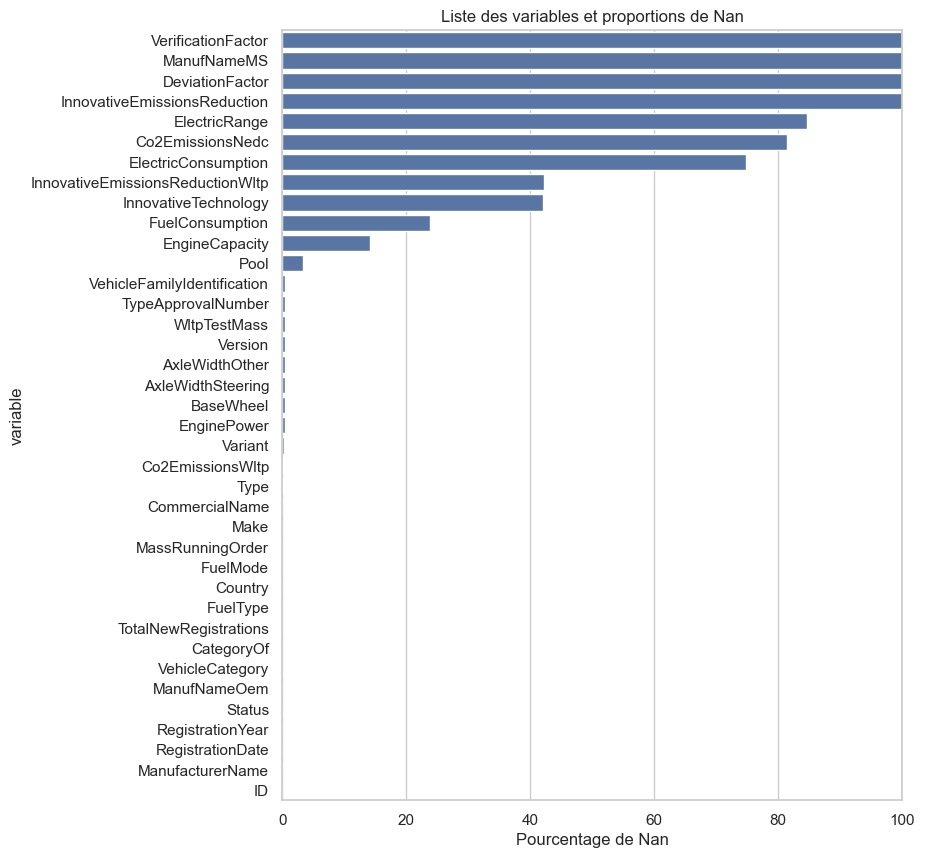

In [90]:
# Inspection des NaN (2)

fig = plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.barplot(y=table.index, x='proportion de Nan en %', data=table, orient = 'h')
plt.title('Liste des variables et proportions de Nan')
ax.set_xlim(0, 100)
plt.ylabel('variable')
plt.xlabel('Pourcentage de Nan')

In [91]:
# Inspection des duplicata
df.duplicated().sum()

518197

# 3. Preprocessing - Nettoyage des données


## 3.1 Suppression des colonnes inutiles
--> Recherches complémentaires et justifications dans le NoteBook "02 Explo_correl.
ipynb"  
--> Recherche d'informations sur les parametres donnés dans le dataset dans le doc: "Complément sur l'exploration des variables.odt"

<br>

1 Recherche de colonnes trop liées -> On supprime la colonne  
2 Recherche de carac non corrélées avec CO2  -> On supprime la colonne ?   

- Matrice de corrélation
- Recherche graphique
- Coef de correlation  
  <br>



In [44]:
df

,Pool,CategoryOf,MassRunningOrder,Co2EmissionsWltp,FuelType,EngineCapacity,EnginePower,InnovativeTechnology,InnovativeEmissionsReductionWltp,FuelConsumption,ElectricRange
195,STELLANTIS,M1,1245.0,129.0,PETROL,1199.0,74.0,1.0,1.30,NaN,NaN
196,STELLANTIS,M1,1245.0,128.0,PETROL,1199.0,74.0,1.0,1.30,5.7,NaN
197,STELLANTIS,M1,1245.0,128.0,PETROL,1199.0,74.0,1.0,1.30,5.7,NaN
200,STELLANTIS,M1,1245.0,129.0,PETROL,1199.0,74.0,1.0,1.30,5.7,NaN
201,STELLANTIS,M1,1245.0,128.0,PETROL,1199.0,74.0,1.0,1.30,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8517878,NaN,M1,1665.0,131.0,PETROL,2487.0,131.0,0.0,0.00,NaN,NaN
8517879,NaN,M1,1195.0,124.0,PETROL,998.0,74.0,1.0,2.17,NaN,NaN
8517880,NaN,M1,1195.0,124.0,PETROL,998.0,74.0,1.0,2.17,NaN,NaN
8517881,NaN,M1,1444.0,139.0,PETROL,1482.0,118.0,0.0,0.00,NaN,NaN


In [92]:
# Suppression des colonnes inutiles
# Suppression des colonnes: Peu d'interet pour prédire la cible.

to_drop = ['ID', 'Country', 'VehicleFamilyIdentification', 'ManufacturerName', 'ManufNameOem', 'ManufNameMS',
           'TypeApprovalNumber', 'Type', 'Variant', 'Version', 'Make', 'CommercialName', 'VehicleCategory',
           'TotalNewRegistrations', 'Co2EmissionsNedc', 'WltpTestMass',
           'BaseWheel', 'AxleWidthSteering', 'AxleWidthOther',
           'FuelMode', 'ElectricConsumption', 'InnovativeEmissionsReduction', 'DeviationFactor', 'VerificationFactor', 'Status',
           'RegistrationYear', 'RegistrationDate']

df.drop(to_drop, axis=1, inplace=True)


In [ ]:
print(df.columns)

Index(['Pool', 'CategoryOf', 'MassRunningOrder', 'Co2EmissionsWltp',
       'FuelType', 'EngineCapacity', 'EnginePower', 'InnovativeTechnology',
       'InnovativeEmissionsReductionWltp', 'FuelConsumption', 'ElectricRange'],
      dtype='object')


### Suppression des colonnes inutiles - Justifications
--> Voir si besoin des justifications et études plus détaillées dans le fichiers "02 Explo_correl. ipynb"

- References de la voiture:  On conserve uniquement la colonne 'Pool' (Mp) pour le nom de la holding. Trop de modalités si on garde les marques.
- On supprime les dates (toutes en 2021 sur le dataset utilisé)

- 4 Colonnes pour laquelle on a fait une étude complémentaire garder/jetter (trop corrélées ou pas exploitables)
    - 'ElectricConsumption', 'InnovativeTechnology', 'InnovativeEmissionsReductionWltp', 'ElectricRange'
    - Impact faible, ne concerne qu'une part des voitures (Hybrid pour ER et EC, non Elec/Hybrid pour IT et IR)  
    - Etude faite plus bas et dans les docs complémentaires d'exploration des données (voir fich "02 Explo_correl. ipynb": ).

### Suppression des colonnes inutiles - Justifications 2   
(voir fich "02 Explo_correl. ipynb": )

- BaseWheel, Axle pas ou trop peu corrélé avec Co2 et tres corrélées entre elles. On pourrait n'en garder qu'un pour rendre compte de la "taille" de la voiture.
- Mais, ces variables  (Axle, BaseWhell) sont aussi tr_s corrélées avec la Masse, qui rend aussi compte de la "taille" de la voiture?  
 --> Donc on ne va garder que la Masse pour résumer teoiutes ces variables    --> Supr BaseWheel, Axle. (Et on garde Mass)  

- "MassRunningOrder" a une corrélation presque totale avec "WltpTestMass" (deux méthodes différentes de calcul de la masse).      -> Suprimer un des deux? On garde celle qui a le moins de valeurs manquantes: "MassRunningOrder"
</br>

### Cas de "FuelConsumption"
 FuelConsumption est la variable trés (trop) corrélée avec Co2, ce qui parait logique.  
 Dans le cadre de notre projet (voir introduction), nous avons décidé de supposer cette valeur inconnue pour les raisons suivantes:  
1. Pour correspondre à notre problématique qui est la prédiction du niveau de Co2, sans connaissance de la consommation du véhicule (voir problématique dans le rapport de projet)  
2.  Pour ne pas avoir une variable qui "masque" l'influence de toutes les autres, et ainsi etre confrontéà une problématique offrant plus de challenge.
  --> On supprime donc cette variable


### Bilan dataset actuel

In [15]:
df.head()

,Pool,CategoryOf,MassRunningOrder,Co2EmissionsWltp,FuelType,EngineCapacity,EnginePower,InnovativeTechnology,InnovativeEmissionsReductionWltp,FuelConsumption,ElectricRange
195,STELLANTIS,M1,1245.0,129.0,PETROL,1199.0,74.0,1.0,1.3,NaN,NaN
196,STELLANTIS,M1,1245.0,128.0,PETROL,1199.0,74.0,1.0,1.3,5.7,NaN
197,STELLANTIS,M1,1245.0,128.0,PETROL,1199.0,74.0,1.0,1.3,5.7,NaN
200,STELLANTIS,M1,1245.0,129.0,PETROL,1199.0,74.0,1.0,1.3,5.7,NaN
201,STELLANTIS,M1,1245.0,128.0,PETROL,1199.0,74.0,1.0,1.3,5.7,NaN


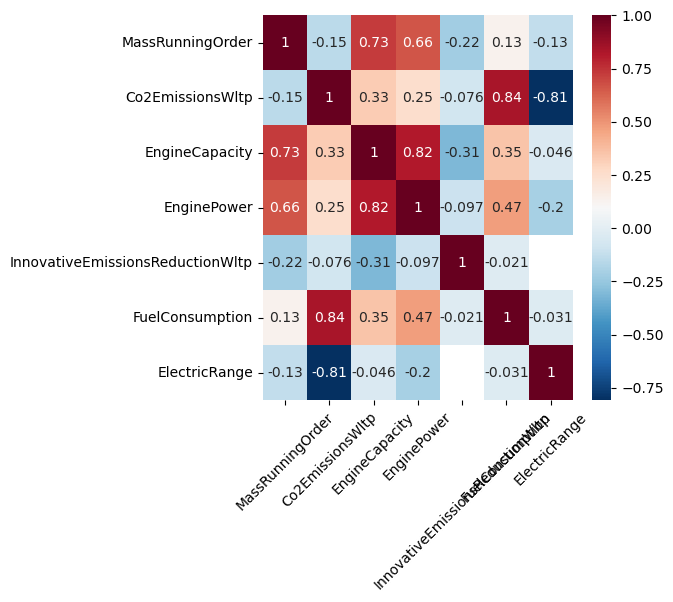

In [8]:
# Heatmap; Corrélation des variables quatitatives
# On enleve temporairement les var categorielles

dfg = df.drop(['Pool', 'CategoryOf', 'FuelType', 'InnovativeTechnology' ], axis=1)

plt.figure(figsize = (5,5))
sns.heatmap(dfg.corr(), annot = True, cmap='RdBu_r')
plt.xticks(rotation=45)
plt.show()

## 3.2 Suppression des véhicules non polluants (pas de variable cible)

In [93]:
# Suppression des véhicules non polluants ( = 'HYDROGEN', 'ELECTRIC', 'UNKNOWN')
# -> Ceux avec fuelType = lectrique/hydrogène/inconnu

df.drop(df.loc[df['FuelType'].isin(['HYDROGEN', 'ELECTRIC', 'UNKNOWN'])].index, inplace=True)

print(df['FuelType'].value_counts())

# Suppression des lignes sans valeur pour la cible 'Co2EmissionsWltp'

df.dropna(subset='Co2EmissionsWltp', inplace = True)
print(df['Co2EmissionsWltp'].describe())



FuelType
PETROL             4317963
DIESEL             1868840
PETROL/ELECTRIC     904203
LPG                 118374
DIESEL/ELECTRIC      53983
E85                  41918
NG                    6331
NG-BIOMETHANE           29
Name: count, dtype: int64
count    7.297961e+06
mean     1.262563e+02
std      4.560769e+01
min      4.000000e+00
25%      1.160000e+02
50%      1.290000e+02
75%      1.460000e+02
max      5.720000e+02
Name: Co2EmissionsWltp, dtype: float64


## 3.3 Traitement de la colonne FuelType

In [94]:
# Traitement de la colonne FuelType

# On regroupe et renomme pertinemment les types de carcurants: 'PETROL', 'DIESEL', 'NATURALGAS', 'PETROL/ELECTRIC', 'DIESEL/ELECTRIC', 'HYDROGEN', 'ELECTRIC'
# Petrol/electric ou 'DIESEL/ELECTRIC' sont des voiture Hybrides

df.loc[df['FuelType'] == 'petrol/electric', 'FuelType'] = 'PETROL/ELECTRIC'
df.loc[df['FuelType'] == 'E85', 'FuelType'] = 'ETHANOL'
df.loc[df['FuelType'] == 'NG-BIOMETHANE', 'FuelType'] = 'NATURALGAS'
df.loc[df['FuelType'] == 'NG', 'FuelType'] = 'NATURALGAS'

print(df['FuelType'].value_counts())

FuelType
PETROL             4308351
DIESEL             1866666
PETROL/ELECTRIC     902417
LPG                 118294
DIESEL/ELECTRIC      53973
ETHANOL              41901
NATURALGAS            6359
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='FuelType'>

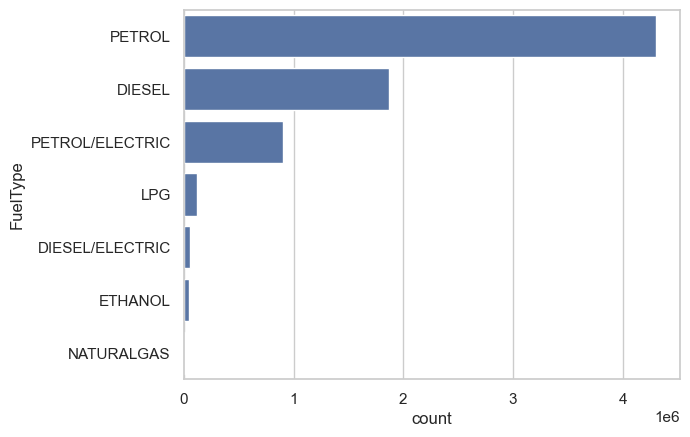

In [95]:
t = df['FuelType'].value_counts() 	
sns.barplot(data=t, orient = 'h')

## 3.4 Traitement de 'InnovativeEmissionsReductionWltp'
Inspection avant dichotomisation de 'InnovativeTechnology' pour mieux comprendre et gérer ces colonnes. (Gestion de nombreux NaN)

In [96]:
# info

df['InnovativeEmissionsReductionWltp'].describe()
# mean 1.5
# min/25/50/75/max: 0.5/1.1/1.7/2/4.5

count    4.930177e+06
mean     1.521771e+00
std      4.891309e-01
min      5.000000e-01
25%      1.100000e+00
50%      1.700000e+00
75%      1.960000e+00
max      4.500000e+00
Name: InnovativeEmissionsReductionWltp, dtype: float64

In [29]:
# info

pd.crosstab(df.InnovativeEmissionsReductionWltp.isna(), df['InnovativeTechnology'].isna(), normalize = False)

InnovativeTechnology,False,True
InnovativeEmissionsReductionWltp,,
False,4930177,0
True,254,2367530


In [ ]:
# Inspection "precoce" pour la gestion des NaN de 'InnovativeEmissionsReductionWltp'

# Pour les IT qui n'ont pas de IERW. Est-ce uniquement des e2 29
# -> 236 voitures IT sans IERW sont e2 29
# -> 254 voitures IT n'ont pas d'IERW
# -> 93% des IT sans IERW sont des e2 29

# Y a t'il assez de e2 29 avec IT et IERW par ailleurs. Oui, il y en a 218 000
# Donc on va supprimer les  IT qui n'ont pas de IERW

# pd.crosstab(1, df['InnovativeTechnology']=='e2 29', normalize = False)
# pd.crosstab(df.InnovativeEmissionsReductionWltp.isna(), df['InnovativeTechnology'].isna(), normalize = False)

In [97]:
# Traitement de la colonne InnovativeTechnology  --> 1 ou 0

df['InnovativeTechnology'].fillna(0, inplace=True)
df.loc[df['InnovativeTechnology'] != 0, 'InnovativeTechnology'] = 1
df['InnovativeTechnology'] = df['InnovativeTechnology'].astype(int)

print(df['InnovativeTechnology'].value_counts().head(10))

InnovativeTechnology
1    4930431
0    2367530
Name: count, dtype: int64


### "InnovativeEmissionsReductionWltp" NaN

  Etude faite plus haut. Toutes les voitures avec IT devraint avoir une valeur IERW  
> Il y a donc 254 "oublis", qui ont toutes le code IT: e2 29  
> Pour ceux-ci il faut soit les supprimer (peu nombreux), soit fillna(mean).  
Apres mettre 0 sur 254 voitures ne changera pas non plus grand chose.

> --> On choisit de les supprimer car il restera 20 000 vehicules "IT = e2 29" qui ont une "IERW". (donc bien assez)  


In [98]:
# Traitement des NaN sur InnovativeEmissionsReductionWltp

# Pour celles qui ont une 'InnovativeTechnology' (254 voitures): On supprime.

# critere de selection des 'InovTech' = True (1)
condition = df['InnovativeTechnology'] == 1

# Suppression pour les 'InovTech' = True
df.loc[condition] = df.loc[condition].dropna(subset='InnovativeEmissionsReductionWltp')

# Remplacement par 0 pour les 'InovTech' = False (0)    (les autres)
df['InnovativeEmissionsReductionWltp'] = df['InnovativeEmissionsReductionWltp'].fillna(0)


# Variante à explorer: Pour celles qui ont une 'InnovativeTechnology': On remplace par mean()
# Calcul de la moyenne et fillna pour les 'InovTech' = True
# moy_IT = round(df.loc[condition, 'InnovativeEmissionsReductionWltp'].mean(),2)     # 1.52
# df.loc[condition, 'InnovativeEmissionsReductionWltp'] = df.loc[condition, 'InnovativeEmissionsReductionWltp'].fillna(moy_IT)

In [99]:
# Controle

df.loc[df['InnovativeEmissionsReductionWltp'].isna(), 'InnovativeTechnology'].value_counts()
df["InnovativeEmissionsReductionWltp"].describe()
pd.crosstab(df.InnovativeEmissionsReductionWltp.isna(), df['InnovativeTechnology'], normalize = False)

InnovativeTechnology,0.0,1.0
InnovativeEmissionsReductionWltp,,
False,2367530,4930177


## 3.6 Bilan dataset actuel

In [ ]:
df.head()

,CategoryOf,MassRunningOrder,Co2EmissionsWltp,EngineCapacity,EnginePower,InnovativeTechnology,InnovativeEmissionsReductionWltp,FuelConsumption,ElectricRange,Pool_BMW,Pool_FORD,Pool_HYUNDAI,Pool_HYUNDAI MOTOR EUROPE,Pool_KIA,Pool_MAZDA-SUBARU-SUZUKI-TOYOTA,Pool_MERCEDES-BENZ,Pool_RENAULT-NISSAN-MITSUBISHI,Pool_STELLANTIS,Pool_TESLA,Pool_TESLA-HONDA-JLR,Pool_VOLKSWAGEN,Pool_VW-SAIC,Fuel_DIESEL,Fuel_DIESEL/ELECTRIC,Fuel_ETHANOL,Fuel_LPG,Fuel_NATURALGAS,Fuel_NG,Fuel_PETROL,Fuel_PETROL/ELECTRIC
195,M1,1245.0,129.0,1199.0,74.0,1,1.3,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
196,M1,1245.0,128.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
197,M1,1245.0,128.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
200,M1,1245.0,129.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
201,M1,1245.0,128.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### Bilan correlation variables quantitatives

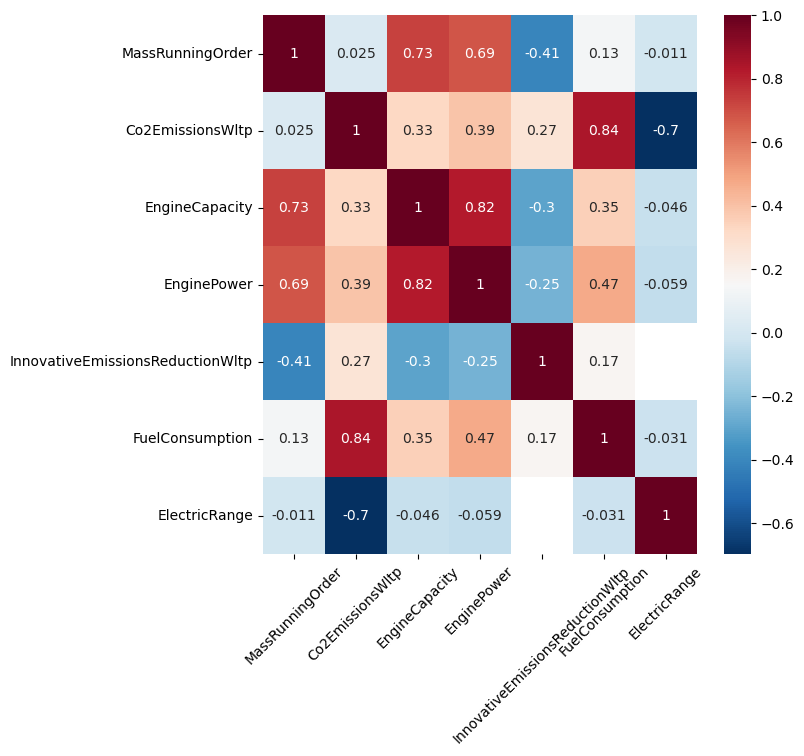

In [14]:
## Heatmap

# On enleve temporairement les var categorielles
dfg = df.drop(['Pool', 'CategoryOf', 'FuelType', 'InnovativeTechnology' ], axis=1)

# Sans Fuel Conso, CO2 en premier
# dfg = df.drop(['CategoryOf', 'InnovativeTechnology', 'ElectricRange', 'FuelConsumption'], axis=1)

plt.figure(figsize = (7,7))
sns.heatmap(dfg.corr(), annot = True, cmap='RdBu_r')
plt.xticks(rotation=45)
plt.show()

## 3.7 Gestion des NaN

In [100]:
df.isna().mean()*100

Pool                                 3.105141
CategoryOf                           0.003480
MassRunningOrder                     0.003535
Co2EmissionsWltp                     0.003480
FuelType                             0.003480
EngineCapacity                       0.003768
EnginePower                          0.003494
InnovativeTechnology                 0.003480
InnovativeEmissionsReductionWltp     0.000000
FuelConsumption                     11.063378
ElectricRange                       89.805591
dtype: float64

### 3.7.1 ElectricRange NaN




In [ ]:
# Mathieu: On catégorise la colonne "ElectricRange NaN" cette colonne en 4 labels pour éviter de "pénaliser" les véhicules sans aucune propulsion électrique:

# Ludo: Je vois pas l'interet. On perd de l'information. Qu'est ce qu'on y gagne ?
# Je mettrai plutot 0 si ce sont des non Hybrides, et mean si ce sont des Hybrides.

# Matthieu: Ca permet de traiter le 0 comme une caractéristique et non une valeur nulle sur une plage continue
# Sinon on mélange des catégories de véhicules qui se comparent difficilememnt avec le même critère
# Et le groupe de véhicules sans la caractéristique se retrouve proche de véhicules qui l'ont, mais avec des faibles performances (autonomie)
# A vérifier avec Khalil...

# Y a t'il des "vrai" NaN "erreur" chez les non elec/Hybrides (celule suivante)

In [ ]:
df['ElectricRange'].describe()

In [101]:
# Gestion des NaN ElectricRange

# Y a t'il des NaN "erreur" chez les non/(elec ou Hybrides)
pd.crosstab(df.ElectricRange.isna(), df['FuelType'], normalize = False)

# --> Oui. 18 voitures 'PETROL' on un Electric-Range. Soit ce sont en fait des Hybrides, soit il y a un Elec Range par erreur
# --> A supprimer (18 voitures ne vont pas changer le fit )
df.drop(df.loc[(df['FuelType'] == 'PETROL') & (~df['ElectricRange'].isna())].index, inplace=True)

# Controle
pd.crosstab(df.ElectricRange.isna(), df['FuelType'], normalize = False)


FuelType,DIESEL,DIESEL/ELECTRIC,ETHANOL,LPG,NATURALGAS,PETROL,PETROL/ELECTRIC
ElectricRange,,,,,,,
False,0,43694,0,0,0,0,700272
True,1866666,10279,41901,118294,6359,4308079,202145


In [102]:
# Etude:
# Remplacement des NaN (minoritaires) par la mean ou med pour les Hybrides
# Y a t'il une différence de moyenne entre Hybrid Diesel et Petrol  --> Non (pas sur mean)
# --> ca ira, on peut faire ce remplacement

df.groupby('FuelType')['ElectricRange'].describe()

,count,mean,std,min,25%,50%,75%,max
FuelType,,,,,,,,
DIESEL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIESEL/ELECTRIC,43694.0,62.368954,22.066822,41.0,48.0,52.0,87.0,106.0
ETHANOL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NATURALGAS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PETROL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PETROL/ELECTRIC,700272.0,61.914433,10.235016,13.0,55.0,62.0,69.0,199.0


In [103]:
# On remplace Les NaN de ElectricRange des Hybrides par Mean()
# Cela concerne environs 20% de ces voitures

# critere de selection des hybrides
condition = df['FuelType'].isin(['PETROL/ELECTRIC' , 'DIESEL/ELECTRIC'])

# Calcul de la moyenne et fillna pour les hybrides
moy_hybrid = round(df.loc[condition, 'ElectricRange'].mean())      # 62
df.loc[condition, 'ElectricRange'] = df.loc[condition, 'ElectricRange'].fillna(moy_hybrid)

# Remplacement par 0 pour les non hybrides
df['ElectricRange'] = df['ElectricRange'].fillna(0)

# Controle
df.ElectricRange.value_counts().head(3)


ElectricRange
0.0     6341553
62.0     267393
61.0      55648
Name: count, dtype: int64

### 3.7.4 FuelConsumption NaN

Meme si cette variable n'a pas vocation à être utilisée dans nos modèles ML,  
On fait la gestion des NaN au cas ou on en aurait besoin par la suite. -->

Si on utilise pas FuelConso -> Suppr de la colonne  
Si on utilise Fuel Consumption: -> Suppr les 11% de NaN




In [105]:
df['FuelType'].value_counts()

FuelType
PETROL             4308079
DIESEL             1866666
PETROL/ELECTRIC     902417
LPG                 118294
DIESEL/ELECTRIC      53973
ETHANOL              41901
NATURALGAS            6359
Name: count, dtype: int64

In [88]:
# Etude sur FuelConso = NaN

# Verif si toutes les valeurs on bien un EC et FC
# display(pd.crosstab(df.FuelConsumption.isna( df['ElectricRange'].isna()))

# lien FuelConsumption_NaN / ElectricRange  -- > FC_NaN comporte 93% de ER_NaN, et 7% de ER_renseigné, donc peu de conclusion possible.

# Quelle energie pour les FuelConsumption-NaN
pd.crosstab(df.FuelConsumption.isna(), df['FuelType'])

# Répartition des NaN
# --> 10% des diesels; 8% des petrols, varié sinon. (normalize = 1)
# --> l'ensemble des FC-NaN se compose de: Petrol (41%), Hyprides(35%) Diesel (22%) ..etc,
# --> Pas de conclusion claire

# Recherche de liens FC-NaN avec autres features
# -- > Aucun

# Conclusion:
# 1/ On "sort" 11% des données
# 2/ On remplace par mean
# 3/ On remplace par le coef de correl le plus fort (Co2, Engine Power.. complexe)
# 4/ Que font les modèles face aux NaN ?


FuelType,DIESEL,DIESEL/ELECTRIC,ETHANOL,LPG,NATURALGAS,PETROL,PETROL/ELECTRIC
FuelConsumption,,,,,,,
False,1685885,29444,41848,111924,5622,3974243,641594
True,180781,24529,53,6370,737,333836,260823


In [19]:
# Traitement des FuelConsumption = NaN

# 1/ Si on a besoin de la Fuel Consomption, On choisit de supprimer les NaN soit 11% des données.
# df.dropna(subset='FuelConsumption', inplace = True)

# 2/ Si on fait une étude sans la FuelConsumption dans les features = Suppression de la colonne.
df = df.drop(['FuelConsumption'], axis=1)



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7297943 entries, 195 to 8517882
Data columns (total 10 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Pool                              object 
 1   CategoryOf                        object 
 2   MassRunningOrder                  float32
 3   Co2EmissionsWltp                  float32
 4   FuelType                          object 
 5   EngineCapacity                    float32
 6   EnginePower                       float32
 7   InnovativeTechnology              float64
 8   InnovativeEmissionsReductionWltp  float32
 9   ElectricRange                     float32
dtypes: float32(6), float64(1), object(3)
memory usage: 445.4+ MB


### 3.7.3 On supprime les lignes avec au moins 1 NaN


In [107]:
# Recherche des NaN 

df.dropna(inplace=True)
df.isna().mean()

Pool                                0.0
CategoryOf                          0.0
MassRunningOrder                    0.0
Co2EmissionsWltp                    0.0
FuelType                            0.0
EngineCapacity                      0.0
EnginePower                         0.0
InnovativeTechnology                0.0
InnovativeEmissionsReductionWltp    0.0
FuelConsumption                     0.0
ElectricRange                       0.0
dtype: float64

### 3.7.5 Bilan (avant Dummies)

In [20]:
df.columns

Index(['Pool', 'CategoryOf', 'MassRunningOrder', 'Co2EmissionsWltp',
       'FuelType', 'EngineCapacity', 'EnginePower', 'InnovativeTechnology',
       'InnovativeEmissionsReductionWltp', 'FuelConsumption', 'ElectricRange'],
      dtype='object')

In [108]:
# Variables quantitatives - Affichage résumé
columns_list = ['Co2EmissionsWltp', 'EngineCapacity', 'EnginePower',
                 'MassRunningOrder', 'ElectricRange', 'InnovativeEmissionsReductionWltp']
t= df[columns_list].describe().round(1)
display(t)


,Co2EmissionsWltp,EngineCapacity,EnginePower,MassRunningOrder,ElectricRange,InnovativeEmissionsReductionWltp
count,6320821.0,6320821.0,6320821.0,6320821.0,6320821.0,6320821.0
mean,128.9,1571.4,108.0,1474.1,6.1,1.1
std,42.4,532.9,52.2,314.9,18.5,0.8
min,12.0,875.0,44.0,910.0,0.0,0.0
25%,118.0,1199.0,74.0,1248.0,0.0,0.0
50%,130.0,1498.0,96.0,1421.0,0.0,1.2
75%,145.0,1968.0,118.0,1649.0,0.0,1.9
max,572.0,7993.0,1177.0,3530.0,128.0,4.5


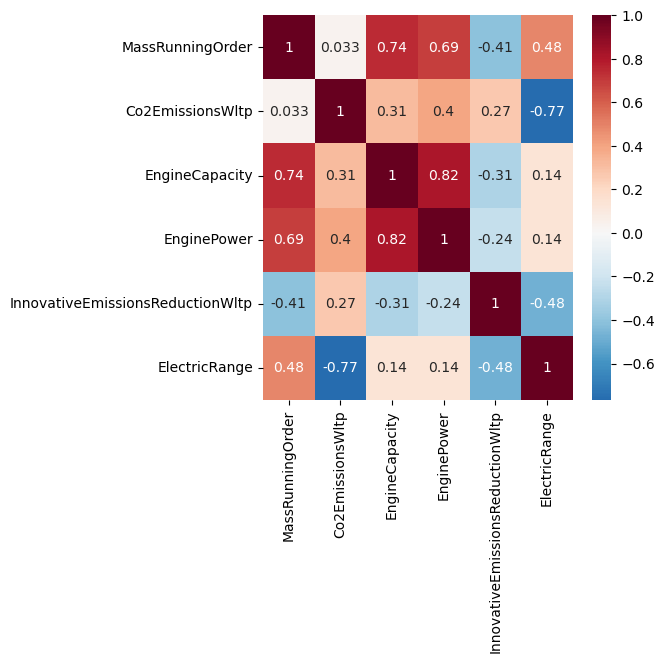

In [97]:
dfg = df.drop(['CategoryOf', 'InnovativeTechnology', 'Pool', 'FuelType'], axis=1)

plt.figure(figsize = (5,5))
sns.heatmap(dfg.corr(), annot = True, cmap='RdBu_r', center = 0)
plt.show()

In [33]:
# Preparation et Sauvegarde d'un dataset non dummies (Pour affichage Streamlit)
# Apres rename Co2 et CO2_grade
# à 200 000 valeurs, 

name = "c02_non_dummies_reduit_2e5"
dft = df.sample(200000, random_state=10)

dft.to_pickle('./Dataset/'+ name +'.pkl')    # 9 Mo
dft.to_csv('./Dataset/'+ name +'.csv', index = False)     # 13 Mo

len(dft)



200000

In [34]:
# Lecture du dataset réduit pour test: 

name = "c02_non_dummies_reduit_2e5"
dft2 = pd.read_pickle('./Dataset/'+ name +'.pkl')    # 9 Mo
# dft3 = pd.read_csv('./Dataset/'+ name +'.csv', )    # 13 Mo 


## 3.8 Gestion des Colonnes Catégorielles: `'Pool', 'CategoryOf', 'FuelType'`
2 solution: Dummies ou LAbelEncoder (en fonction du modèle). On choisit d'abord Dummies   




        
**Proposition pour les "Pool":**   
- Grouper TESLA 1 et 2 ?    --> Non fait
- Grouper HYUNDAI 1 et 2 ?  --> Non fait

**"CategoryOf" :**  
- M1 ou M1G uniquement. MiG est la sous catégorie de M1 qui correspond à "Vehicule tout terrain'  
- Donc on dichotomise: 0 si M1, 1 Si M1G

In [109]:
df['CategoryOf'].value_counts()

CategoryOf
M1     6050239
M1G     270582
Name: count, dtype: int64

In [110]:
# Colonne  'Pool' --> Dummies
dft = pd.get_dummies(data = df['Pool'], dtype=int, prefix='Pool')
df = df.join(dft)
df.drop('Pool', axis = 1, inplace=True)

# Colonne  'FuelType' --> Dummies
dft = pd.get_dummies(data = df['FuelType'], dtype=int, prefix='Fuel')
df = df.join(dft)
df.drop('FuelType', axis = 1, inplace=True)

# Traitement de la colonne 'CategoryOf'  --> 0 ou 1
df['CategoryOf']=df['CategoryOf'].replace(['M1','M1G'],[0,1])

"""
Comment gérer les NaN pour 'Pool' ?:
- soit 0 dans toutes les colonnes (pas de Pool) --> Solution retenue
- Soit une colonne supl "Pool_Inconnu"
""";

## 3.9. Standardisation / Normalisation des données ?
   -->  A voir en fonction du modèle choisi

### Tests de normalité

Il ne reste que des variables continues et binaires. Les variables continues suivent-elles une loi normale.  

Pour les modèles nécessitant un scaling de variable, on procèdera à une standardisation Standard (Z-score) ou MinMax. On pourra étudier l'influence du type de normalisation sur les modèles.  

Dans un premier temps, on va regarder la distribution des variables


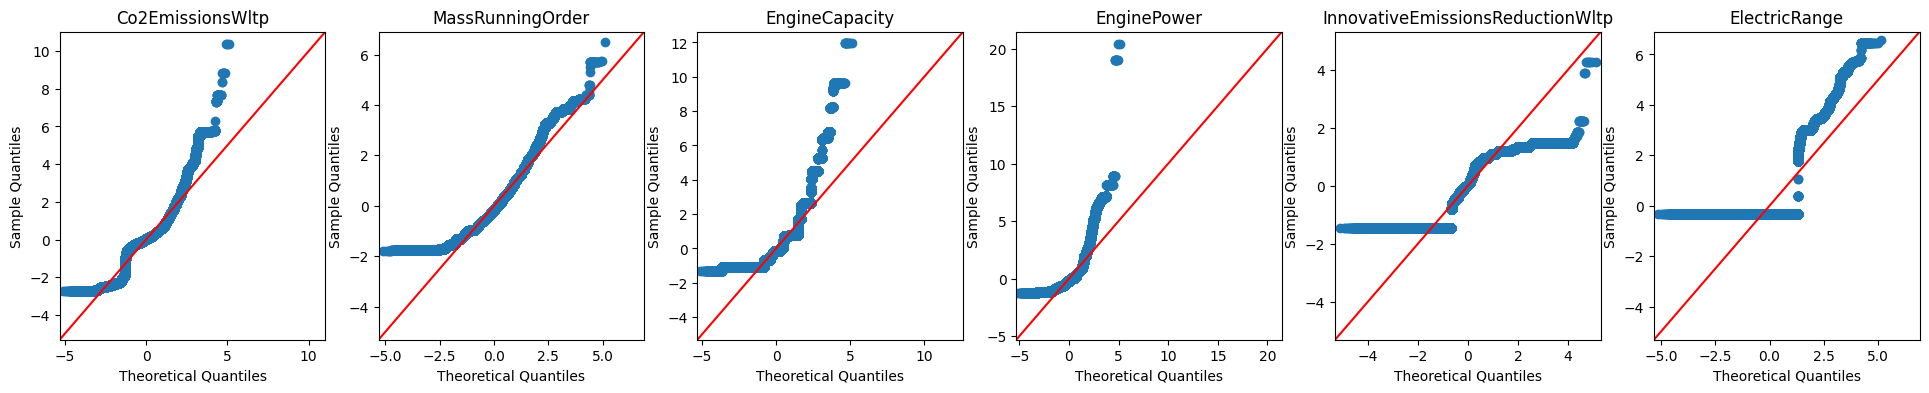

In [ ]:
# Diagrammes de quartilles (QQ-plot) pour les variables quantitatives

import statsmodels.api as sm

#sm.qqplot(echantillon, fit=True, line='45')
fig, axes = plt.subplots(1,6, figsize=(24,4))
axes = axes.flatten()

# for i, col in enumerate(df.columns[:4]):
for i, col in enumerate([ 'Co2EmissionsWltp', 'MassRunningOrder', 'EngineCapacity', 'EnginePower', 'InnovativeEmissionsReductionWltp', 'ElectricRange']):
    ax = axes[i]
    sm.qqplot(df[col], fit=True, line='45', ax=ax)
    ax.set_title(col)


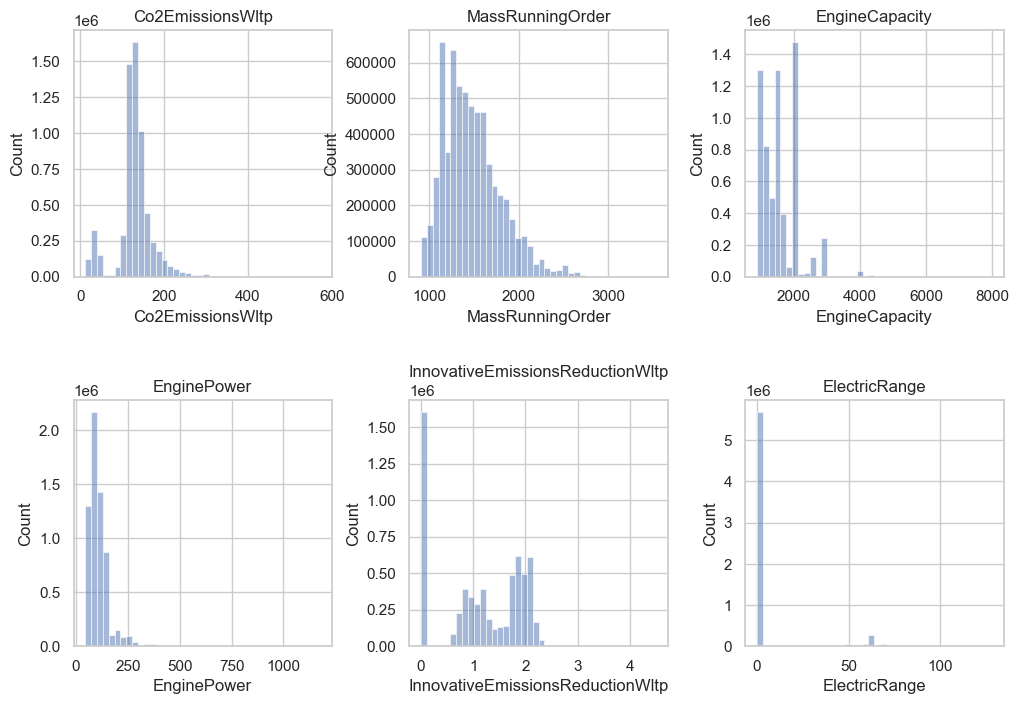

In [111]:
# Distributions des variables Quantitatives

#sm.dislot(echantillon, fit=True, line='45')
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i, col in enumerate([ 'Co2EmissionsWltp', 'MassRunningOrder', 'EngineCapacity', 'EnginePower', 'InnovativeEmissionsReductionWltp', 'ElectricRange']):
  ax = axes[i]
  sns.histplot(x=df[col], bins=40, color='b',alpha=0.5, ax=ax)
  ax.set_title(col)
# plt.xlim(0, 250)




## 3.10 Préparation de la variable cible "CO2" pour classification

![image.png](attachment:image.png)


In [112]:
# Transformation en classes de polution de la variable cible CO2 (selon les normes d'usagee)
# --> Pour les modeles de classifications

# Ludo: j'ai du mettre borne sup à 600
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
bins = [0, 100, 120, 140, 160, 200, 250, 600]

class_target = pd.cut(df['Co2EmissionsWltp'], bins=bins, labels=labels)
class_target.value_counts()
df['Co2Grade'] = class_target

# Changement du nom de la variable cible
df.rename(columns={'Co2EmissionsWltp': 'Co2'}, inplace=True)



In [113]:
#controle
temp = df.loc[df['Co2Grade'].isna()]
temp[['Co2Grade', 'Co2']]

from collections import Counter
Counter(class_target)

len(class_target)



6320821

In [114]:
df

,CategoryOf,MassRunningOrder,Co2,EngineCapacity,EnginePower,InnovativeTechnology,InnovativeEmissionsReductionWltp,FuelConsumption,ElectricRange,Pool_BMW,Pool_FORD,Pool_HYUNDAI,Pool_HYUNDAI MOTOR EUROPE,Pool_KIA,Pool_MAZDA-SUBARU-SUZUKI-TOYOTA,Pool_MERCEDES-BENZ,Pool_RENAULT-NISSAN-MITSUBISHI,Pool_STELLANTIS,Pool_TESLA,Pool_TESLA-HONDA-JLR,Pool_VOLKSWAGEN,Pool_VW-SAIC,Fuel_DIESEL,Fuel_DIESEL/ELECTRIC,Fuel_ETHANOL,Fuel_LPG,Fuel_NATURALGAS,Fuel_PETROL,Fuel_PETROL/ELECTRIC,Co2Grade
196,0,1245.0,128.0,1199.0,74.0,1.0,1.30,5.7,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,C
197,0,1245.0,128.0,1199.0,74.0,1.0,1.30,5.7,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,C
200,0,1245.0,129.0,1199.0,74.0,1.0,1.30,5.7,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,C
201,0,1245.0,128.0,1199.0,74.0,1.0,1.30,5.7,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,C
202,0,1245.0,128.0,1199.0,74.0,1.0,1.30,5.7,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517870,0,1033.0,105.0,999.0,52.0,1.0,1.28,4.6,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,B
8517871,0,1033.0,105.0,999.0,52.0,1.0,1.28,4.6,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,B
8517872,0,1033.0,105.0,999.0,52.0,1.0,1.28,4.6,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,B
8517873,0,1033.0,105.0,999.0,52.0,1.0,1.28,4.6,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,B


# 4 Sauvegarde du dataset
> #### ATTENTION Ce dataset contient les 2 targets

In [21]:
%pwd

'd:\\0 PERSO\\00 LUDO\\Google Drive\\0 LUDO\\Projets\\Cours_info\\05 Projet Dts\\Projet_drive'

In [115]:
# Sauvegarde du Dataset

import pickle

df.to_pickle('./Dataset/c02_fr&al_21_prepross_v07.pkl')                   # 820 Mo
df.to_csv('./Dataset/c02_fr&al_21_prepross_v07.csv', index = False)       # 533 Mo

# TODO: Voir pourquoi l'ancienne version
# c02_fr&al_21_v04_ludo.pkl fait 1,3 Go


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6320821 entries, 196 to 8517874
Data columns (total 30 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   CategoryOf                        int64   
 1   MassRunningOrder                  float32 
 2   Co2                               float32 
 3   EngineCapacity                    float32 
 4   EnginePower                       float32 
 5   InnovativeTechnology              float64 
 6   InnovativeEmissionsReductionWltp  float32 
 7   FuelConsumption                   float32 
 8   ElectricRange                     float32 
 9   Pool_BMW                          int32   
 10  Pool_FORD                         int32   
 11  Pool_HYUNDAI                      int32   
 12  Pool_HYUNDAI MOTOR EUROPE         int32   
 13  Pool_KIA                          int32   
 14  Pool_MAZDA-SUBARU-SUZUKI-TOYOTA   int32   
 15  Pool_MERCEDES-BENZ                int32   
 16  Pool_RENAULT-NISSAN-M

In [117]:
# Export d'un dataset réduit pour des tests de code.

# 10% - 632 000 valeurs
df_10_percent = df.sample(frac=0.1, random_state=0)
df_10_percent.to_pickle('./Dataset/co2_prepro_10_percen.pkl')    # 25 Mo

# à 200 000 valeurs, 
df_reduit_2e5 = df.sample(200000, random_state=10)
df_reduit_2e5.to_pickle('./Dataset/c02_prepro_reduit_2e5.pkl')    # 25 Mo
df_reduit_2e5.to_csv('./Dataset/cc02_prepro_reduit_2e5.csv', index = False)      # 18 Mo

len(df_reduit_2e5)


200000